### Задание 1

In [1]:
import pandas as pd
import numpy as np

Загрузим Boston House Prices

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston.data

In [6]:
data.shape

(506, 13)

In [7]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
target = boston.target

In [9]:
feature_names = boston.feature_names

In [10]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Разабьем на датафреймы тренировочные и тестовые

In [12]:
x = pd.DataFrame(data, columns=feature_names)

In [13]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
x.shape

(506, 13)

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [16]:
y = pd.DataFrame(target, columns=['price'])

In [17]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [18]:
y.shape

(506, 1)

In [19]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

Создадим модель линейнойрегрессии под названием lr

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred = lr.predict(x_test)

In [26]:
check_test =pd.DataFrame({'y_test': y_test['price'],
                          'y_pred': y_pred.flatten()},
                        columns=['y_test', 'y_pred'])

In [27]:
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [28]:
check_test['error'] = check_test['y_pred'] - check_test['y_test']

In [29]:
check_test.head()

,y_test,y_pred,error
173,23.6,28.648960,5.048960
274,32.4,36.495014,4.095014
491,13.6,15.411193,1.811193
72,22.8,25.403213,2.603213
452,16.1,18.855280,2.755280


In [30]:
initial_mse = (check_test['error']**2).mean()
initial_mse

21.51744423117741

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
initial_mse = mean_squared_error(y_test, y_pred)
initial_mse

21.517444231177407

In [33]:
(np.abs(check_test['error'])).mean()

3.16270987145743

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
mean_absolute_error(y_test, y_pred)

3.1627098714574298

Вычислим R2

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test, y_pred)

0.7112260057484906

In [38]:
lr.intercept_

array([31.63108404])

In [39]:
lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Text(0, 0.5, 'Признак')

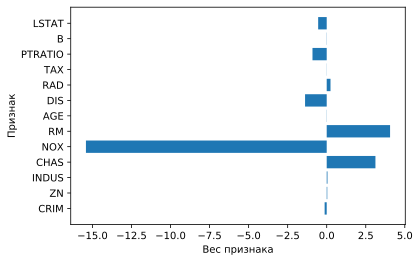

In [41]:
plt.barh(x_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [42]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.469887,11.403955,11.133051,0.073446,0.557259,6.325672,68.799718,3.765874,9.437853,407.042373,18.277966,359.701808,12.421130
std,8.315831,22.608457,6.938651,0.261237,0.116792,0.719211,27.665360,2.126032,8.639971,166.522237,2.256792,86.924779,7.112402
min,0.009060,0.000000,1.210000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082320,0.000000,5.130000,0.000000,0.450000,5.889500,46.025000,2.073700,4.000000,279.000000,16.650000,376.782500,6.862500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.227500,77.350000,3.107300,5.000000,330.000000,18.600000,391.600000,10.925000
75%,3.281688,20.000000,18.100000,0.000000,0.631000,6.681750,93.475000,5.400700,24.000000,666.000000,20.200000,396.172500,16.225000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
x_train_scaled = scaler.fit_transform(x_train)

In [46]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_test.columns)

In [47]:
x_test_scaled = scaler.transform(x_test)

In [48]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [49]:
lr.fit(x_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Признак')

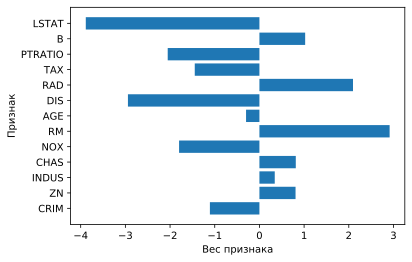

In [50]:
plt.barh(x_train.columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')

In [51]:
feats = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT']

In [52]:
def create_model(x_train, y_train, x_test, y_test, feats, model):
    model.fit(x_train.loc[:, feats], y_train)
    y_pred=model.predict(x_test.loc[:, feats])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [53]:
create_model(x_train_scaled, y_train, x_test_scaled, y_test, feats, LinearRegression())

21.243390345509397

In [54]:
# Сверяем с исходной ошибкой
initial_mse

21.517444231177407

In [55]:
from sklearn.linear_model import Lasso, Ridge

In [56]:
model = Lasso(alpha=0.003)

In [57]:
create_model(x_train_scaled, y_train, x_test_scaled, y_test, feats, model)

21.26916174592534

In [58]:
model = Ridge(alpha=0.01)

In [59]:
create_model(x_train_scaled, y_train, x_test_scaled, y_test, feats, model)

21.24375780603557

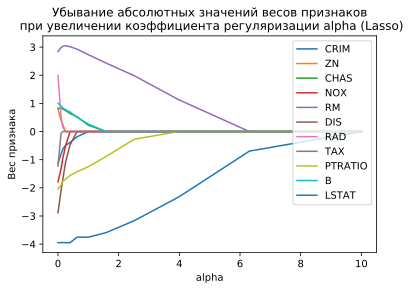

In [60]:
n = 21
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 1, n)
for i, val in enumerate(alpha_list):
    lasso = Lasso(alpha = val)
    lasso.fit(x_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = lasso.coef_.flatten()
    
for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Lasso)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)

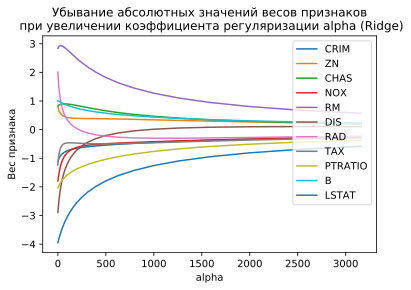

In [61]:
n=66
coeffs = np.zeros((n, len(feats)))
alpha_list = np.logspace(-3, 3.5, n)
for i, val in enumerate(alpha_list):
    ridge = Ridge(alpha = val)
    ridge.fit(x_train_scaled.loc[:, feats], y_train)
    coeffs[i, :] = ridge.coef_.flatten()
    
for i in range(len(feats)):
    plt.plot(alpha_list, coeffs[:, i])
plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xlabel('alpha')
plt.ylabel('Вес признака')
plt.legend(feats)

### Задание 2

In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [63]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [64]:
model.fit(x_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=12, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Вычислим R2

In [65]:
y_pred = model.predict(x_test)

In [66]:
from sklearn.metrics import r2_score

In [67]:
r2_score(y_test, y_pred)

0.8749965273218174

Вывод, если все правильно посчитано то в первом случает предсказание равно 0.7112260057484906 во втором 0.8749965273218174 то второе предсказание ближе к единице будет более точным 